In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import seaborn as sns

https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Protein+Secondary+Structure%29

In [69]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [70]:
#Input
dataset =pd.read_csv("MyDrive/MLData/protein-secondary-structure.train",
                     sep= " ",skiprows=range(7))
print('\n\n')
print(dataset.head(),'\n')




  <>
G  _
V  _
G  _
T  _
V  _ 



In [71]:
fin = open("MyDrive/MLData/protein-secondary-structure.train","r")
aa  = []
sh  = []
nseq= 0
a_,s_ = [],[]

for iline in fin.readlines():
  if '#' not in iline and len(iline)>1:
    if '<>' in iline:
      #print("Start")
      a_ = []
      s_ = []

    elif 'end' in iline:
      nseq = nseq+1
      aa.append(a_)
      sh.append(s_)
      #print("End")

    else:
      x1,x2 = iline.split()
      a_.append(x1)
      s_.append(x2)

print (nseq, "sequences processed")

91 sequences processed


In [72]:
len(sh)

91

(array([ 4.,  1.,  7.,  4.,  3.,  4.,  7.,  6.,  8.,  3., 11.,  2.,  1.,
         2.,  1.,  2.,  3.,  2.,  3.,  2.,  0.,  0.,  2.,  1.,  2.,  4.,
         1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         1.]),
 array([ 26. ,  37.8,  49.6,  61.4,  73.2,  85. ,  96.8, 108.6, 120.4,
        132.2, 144. , 155.8, 167.6, 179.4, 191.2, 203. , 214.8, 226.6,
        238.4, 250.2, 262. , 273.8, 285.6, 297.4, 309.2, 321. , 332.8,
        344.6, 356.4, 368.2, 380. , 391.8, 403.6, 415.4, 427.2, 439. ,
        450.8, 462.6, 474.4, 486.2, 498. ]),
 <a list of 40 Patch objects>)

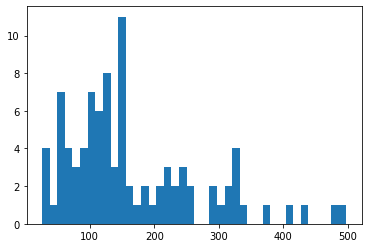

In [73]:
seq_sizes =[]
for i in aa:
  seq_sizes.append(len(i))
plt.hist(seq_sizes,bins=40)

In [74]:
sh_all = ['r' if b=="_" else b for a in sh for b in a]
aa_all = [b for a in aa for b in a]

In [75]:
unq_aa = set(aa_all)
unq_sh = set(sh_all)

In [76]:
d_atoidx = {j : i for i,j in enumerate(unq_aa)}
d_stoidx = {j : i for i,j in enumerate(unq_sh)}
d_idxtoa = {i : j for i,j in enumerate(unq_aa)}
d_idxtos = {i : j for i,j in enumerate(unq_sh)}
d_stoidx['_'] = d_stoidx['r']


In [77]:
print(d_atoidx,d_stoidx)

{'Y': 0, 'P': 1, 'H': 2, 'V': 3, 'G': 4, 'F': 5, 'W': 6, 'K': 7, 'T': 8, 'N': 9, 'S': 10, 'L': 11, 'C': 12, 'E': 13, 'M': 14, 'A': 15, 'R': 16, 'Q': 17, 'I': 18, 'D': 19} {'r': 0, 'h': 1, 'e': 2, '_': 0}


In [78]:
dataset = pd.DataFrame()
dataset["aminoacid"] = [d_atoidx[i] for i in aa_all]
dataset["secondary"] = [d_stoidx[i] for i in sh_all] 
#dataset = pd.DataFrame()
#dataset["aminoacid"] = aa_all
#dataset["secondary"] = sh_all 

In [79]:
dataset2 = pd.get_dummies(dataset,columns=['aminoacid','secondary'])

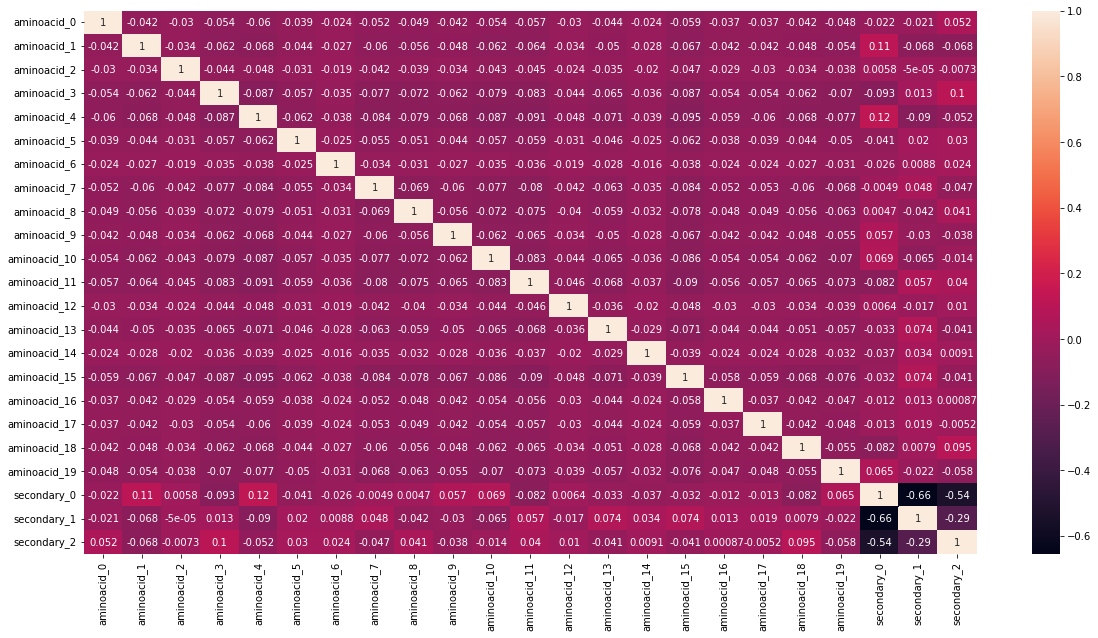

In [80]:
corr = dataset2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [81]:
#Create arrays from original sequences
sh_num = []
aa_num = []
sh_num2= []
aa_num2= []
max_seq= 500 # lARGEST SEQUENCE 
num_a, num_s = len(unq_aa), len(unq_sh)
total_sequences = len(sh)
for i in range(total_sequences):
  s_ = sh[i]
  a_ = aa[i]
  s2_= [d_stoidx[j] for j in s_]
  a2_= [d_atoidx[i] for i in a_]
  npad = max_seq-len(s2_)
  s22_= np.pad(s2_,(0,npad),constant_values=10)
  a22_= np.pad(a2_,(0,npad),constant_values=100)

  sh_num2.append(s22_)
  aa_num2.append(a22_)

  s3_= np.eye(num_s)[s2_]
  a3_= np.eye(num_a)[a2_]
  
  s4_ = np.pad(np.array(s3_),((0,npad,),(0,0)),constant_values=0)
  a4_ = np.pad(np.array(a3_),((0,npad,),(0,0)),constant_values=0)
  sh_num.append(s4_)
  aa_num.append(a4_)


In [82]:
l1=[1,2,3,4]
l2= np.zeros(498).astype(bool)
n1 = np.eye(5)[l1]
n2= [5,6,7]
a1=np.pad(n2,(0,3),constant_values=0)
print(a1)

[5 6 7 0 0 0]


In [83]:
sh_num = np.array(sh_num)
aa_num = np.array(aa_num)
sh_num2= np.array(sh_num2)
aa_num2= np.array(aa_num2)
print(type(sh_num))
print(sh_num.shape,aa_num.shape)

<class 'numpy.ndarray'>
(91, 500, 3) (91, 500, 20)


In [84]:
#Splitting Dataset
x = aa_num
y = sh_num
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = \
  train_test_split(x,y,test_size=0.2,random_state=0)

x2 = aa_num2
y2 = sh_num2
x_train2, x_test2, y_train2,y_test2 = \
  train_test_split(x2,y2,test_size=0.2,random_state=0)


In [85]:
print("X shape:",x.shape,'\n',
      "Y shape ",y.shape,"\n",
      "Train Samples: ", len(x_train),'\n',
      "Test Samples: ",len(x_test),'\n'
      )

X shape: (91, 500, 20) 
 Y shape  (91, 500, 3) 
 Train Samples:  72 
 Test Samples:  19 



### Models

In [86]:
#Metrics
from sklearn.metrics import accuracy_score,\
  confusion_matrix, f1_score, precision_score,recall_score, mean_squared_error
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
class_rm = RandomForestClassifier(random_state=0)
class_rm.fit(x_train2,y_train2)
y_pred = class_rm.predict(x_test2)
mse    = mean_squared_error(y_test2,y_pred)
#cm     = confusion_matrix(y_test2,y_pred)
#acc  = accuracy_score (y_test2,y_pred)
# f1   = f1_score       (y_test,y_pred)
#prec = precision_score(y_test,y_pred)
#rec  = recall_score   (y_test,y_pred)

In [87]:
mse

2.396210526315789

In [88]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


n_samples, n_features = x_train2.shape # 10,100
n_outputs = y_train2.shape[1] 
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
clfit = multi_target_forest.fit(x_train2, y_train2)

In [89]:
clfit

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [90]:
ypred = clfit.predict(x_test2)
mse   = mean_squared_error(ypred,y_test2)
print('mse',mse)

mse 1.679578947368421
